# Random Forest, Gradient Boosting y AdaBoost

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV

In [138]:
data = pd.read_csv('bank_deposit.csv')

In [139]:
data.head()

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra
0,1,261,0,1,1,0,0,0,1
1,2,50,0,1,1,0,0,0,1
2,3,1492,0,1,1,0,0,0,1
3,4,104,0,1,1,0,0,0,1
4,5,13,0,1,1,0,0,0,1


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   idcliente  10578 non-null  int64
 1   duration   10578 non-null  int64
 2   previous   10578 non-null  int64
 3   housing    10578 non-null  int64
 4   campaign   10578 non-null  int64
 5   loan       10578 non-null  int64
 6   default    10578 non-null  int64
 7   target     10578 non-null  int64
 8   muestra    10578 non-null  int64
dtypes: int64(9)
memory usage: 743.9 KB


In [141]:
data['housing'] = data['housing'].astype(object)
data['loan'] = data['loan'].astype(object)
data['default'] = data['default'].astype(object)

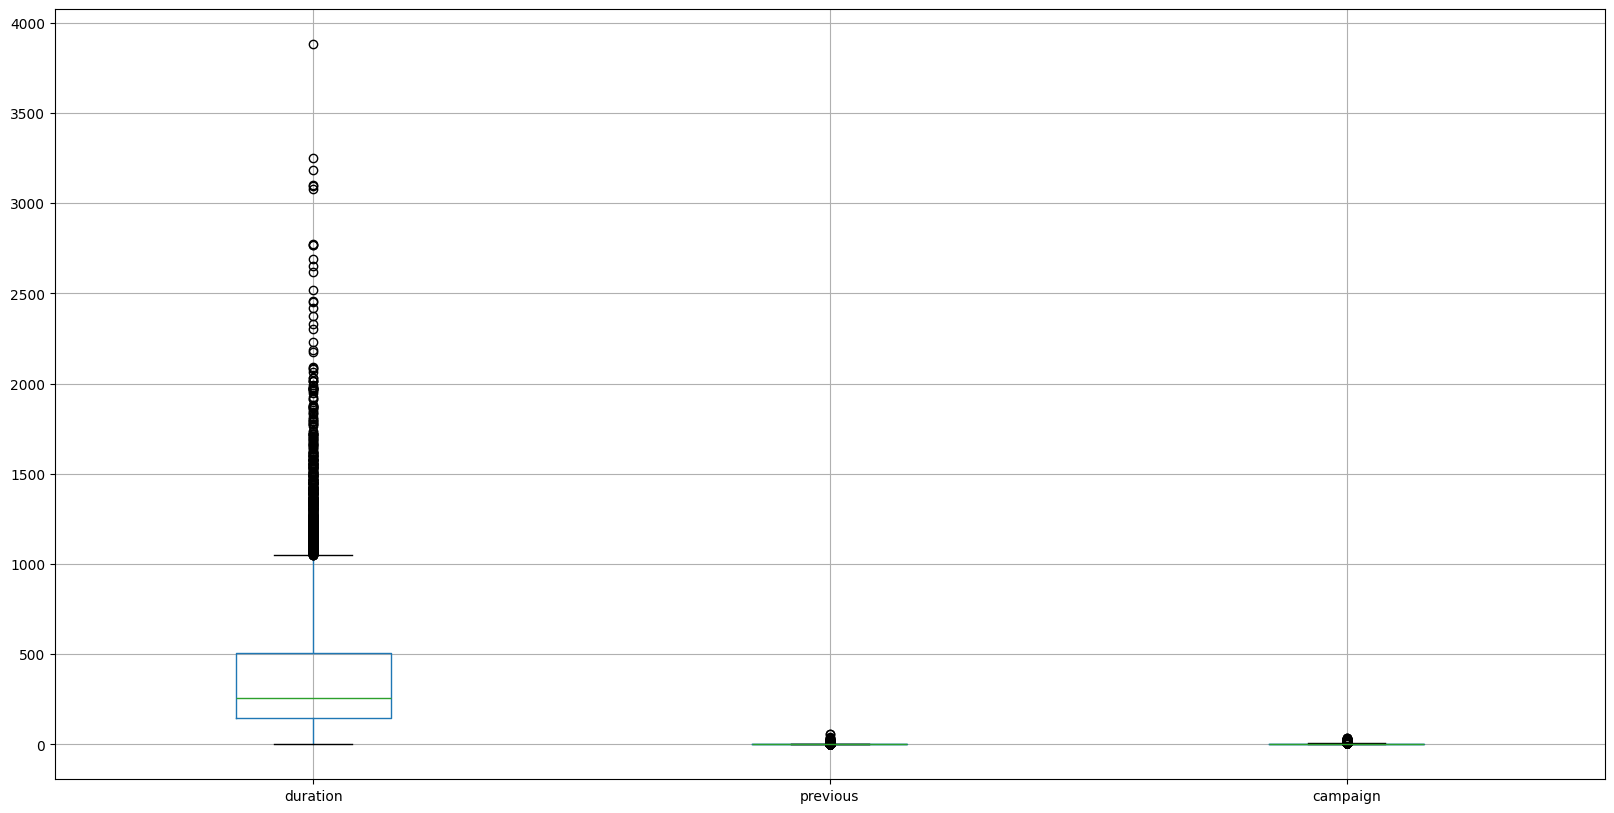

In [142]:
import matplotlib.pyplot as plt

# Eliminar las columnas no deseadas
data_filtered = data.drop(columns=['target', 'muestra', 'idcliente'])

# Crear el boxplot
plt.figure(figsize=(20, 10))
data_filtered.boxplot()
plt.show()

In [143]:
categoric = data.select_dtypes(include=['object'])

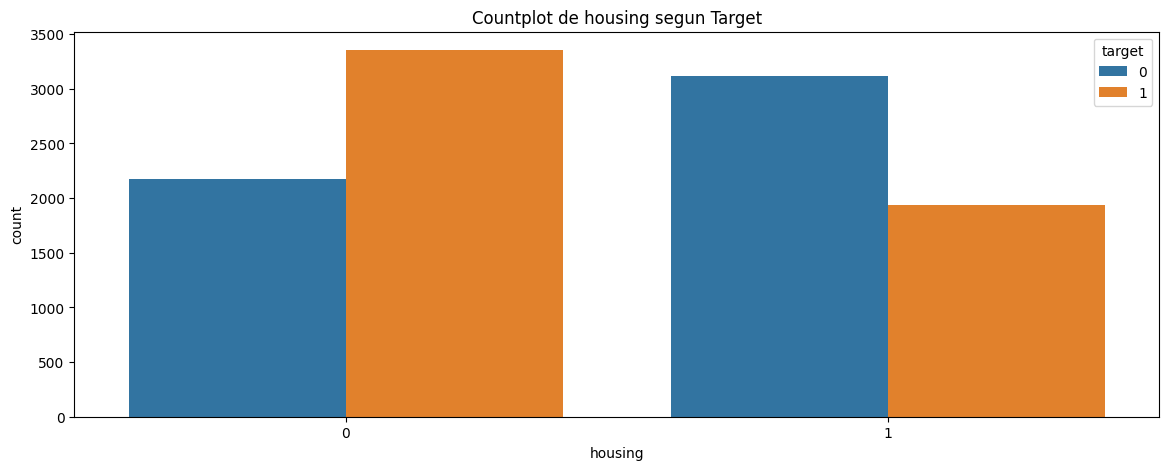

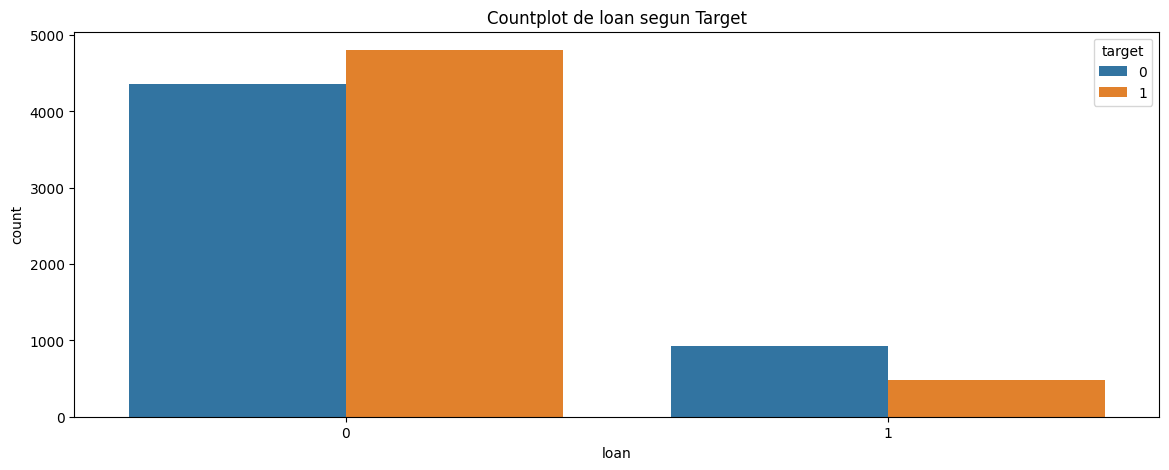

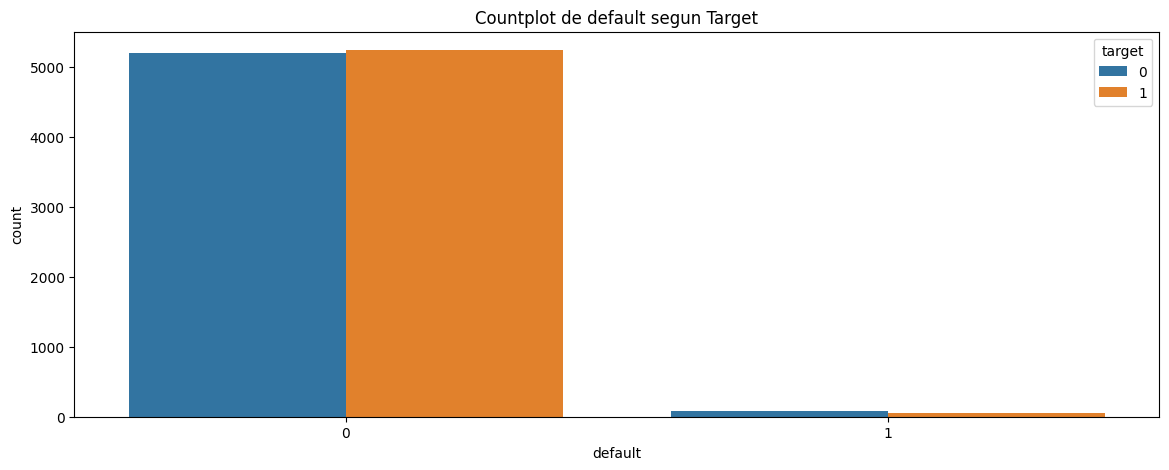

In [144]:
for col in categoric:
    plt.figure(figsize=(14, 5))
    sns.countplot(x = col, hue = 'target', data = data)
    plt.title(f'Countplot de {col} segun Target')
    plt.show()

# TEST LEVENE

In [145]:
#Ho: los datos proceden de distribuciones con la misma varianza
#Ha: los datos no proceden de distribuciones con la misma varianza

#Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, los datos no proceden de distribuciones con la misma varianza
#Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, los datos proceden de distribuciones con la misma varianza

In [146]:
duration_acepta = data.loc[data.target == 1, 'duration']
duration_noacepta = data.loc[data.target == 0, 'duration']

levene_test = ss.levene(duration_acepta, duration_noacepta, center='median')
levene_test

LeveneResult(statistic=1289.4402200805537, pvalue=1.4795573243984309e-266)

In [147]:
previous_acepta = data.loc[data.target == 1, 'previous']
previous_noacepta = data.loc[data.target == 0, 'previous']

levene_test = ss.levene(duration_acepta, duration_noacepta, center='median')
levene_test

LeveneResult(statistic=1289.4402200805537, pvalue=1.4795573243984309e-266)

In [148]:
campaign_acepta = data.loc[data.target == 1, 'campaign']
campaign_noacepta = data.loc[data.target == 0, 'campaign']

levene_test = ss.levene(duration_acepta, duration_noacepta, center='median')
levene_test

LeveneResult(statistic=1289.4402200805537, pvalue=1.4795573243984309e-266)

# Test U-test o Test U de Mann-Whitney-Wilcoxon

In [149]:
#Ho: los datos proceden de distribuciones con la misma mediana
#Ha: los datos no proceden de distribuciones con la misma mediana

#Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, los datos no proceden de distribuciones con la misma mediana
#Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, los datos proceden de distribuciones con la misma mediana

In [150]:
import pingouin as pg

In [151]:
#Target vs Duration
pg.mwu(x=duration_acepta, y=duration_noacepta, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,22591878.5,two-sided,0.0,0.615233,0.807617


In [152]:
#Target vs Previous
pg.mwu(x=previous_acepta, y=previous_noacepta, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,16829530.5,two-sided,3.813065e-122,0.203247,0.601624


In [153]:
#Target vs Campaign
pg.mwu(x=campaign_acepta, y=campaign_noacepta, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,11913400.5,two-sided,4.638831e-44,-0.148237,0.425881


housing     0     1
target             
0        2176  3113
1        3354  1935


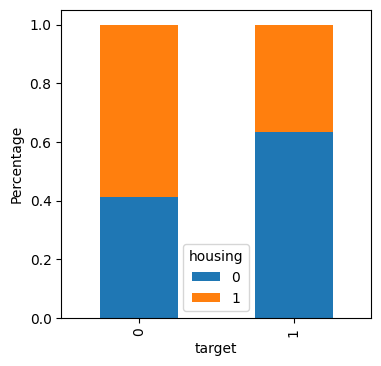

In [154]:
print(pd.crosstab(data["target"],data["housing"]))
t = pd.crosstab(data["target"],data["housing"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

loan       0    1
target           
0       4359  930
1       4805  484


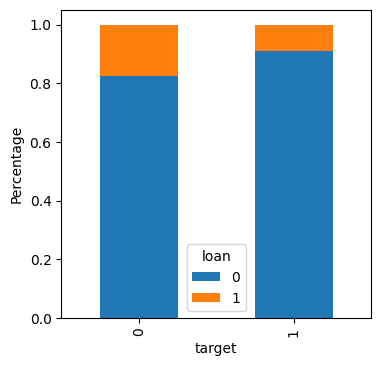

In [155]:
print(pd.crosstab(data["target"],data["loan"]))
t = pd.crosstab(data["target"],data["loan"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

# Prueba Chi-Cuadrado

In [156]:
#Ho: no existe dependencia entre las variables
#Ha: existe dependencia entre las variables

#Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, existe dependencia entre las variables
#Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, no existe dependencia entre las variables

In [157]:
#Target vs Housing

contigencia = pd.crosstab(data['target'], data['housing'])
c, p, dof, expected = chi2_contingency(contigencia) 
print(c, p)

524.9428331418026 3.557728213453099e-116


In [158]:
#Target vs Loan

contigencia = pd.crosstab(data['target'], data['loan'])
c, p, dof, expected = chi2_contingency(contigencia) 
print(c, p)

161.65498241381164 4.921141785848781e-37


# PREPARACION DE DATOS

In [159]:
data.head()

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra
0,1,261,0,1,1,0,0,0,1
1,2,50,0,1,1,0,0,0,1
2,3,1492,0,1,1,0,0,0,1
3,4,104,0,1,1,0,0,0,1
4,5,13,0,1,1,0,0,0,1


In [160]:
X = data.drop(['target', 'idcliente', 'muestra'], axis=1)
y = data['target']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [162]:
X_train_orig = X_train
X_test_orig = X_test

In [163]:
# Convertimos las variables categoricas en numericas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder.fit_transform(X_train[col])
        X_test[col] = label_encoder.fit_transform(X_test[col])

In [164]:
# Normalizamos la data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MODELADO

### RANDOM FOREST

In [165]:
#Tuning
#n_estimators: Número de árboles
#max_features: Cantidad de variables a considerar al buscar el mejor split
#max_depth: Profundidad del árbol

param_grid_rf = {
    'n_estimators': [300, 400, 500, 600, 700],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5, 6]
}

In [166]:
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid_rf,refit=True,verbose=2,cv=5)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   0.4s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=400; total time=   0.5s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=400; total time=   0.5s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=400; total time=   0.5s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=400; total time=   0.5s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=400; total time=   0.5s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=500; total time=   0.7s
[CV] END ...max_depth=2, max_features=sqrt, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [300, 400, 500, 600, 700]},
             verbose=2)

In [167]:
print(grid_rf.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', n_estimators=600)


In [168]:
classifier_rf = RandomForestClassifier(max_depth=6, max_features='log2', n_estimators=600).fit(X_train, y_train)

In [170]:
feature_scores_rf = pd.Series(classifier_rf.feature_importances_, index=['duration', 'previous', 'housing', 'campaign', 'loan',	'default']).sort_values(ascending=False)
feature_scores_rf

duration    0.682198
previous    0.129737
housing     0.117246
campaign    0.041515
loan        0.026814
default     0.002490
dtype: float64

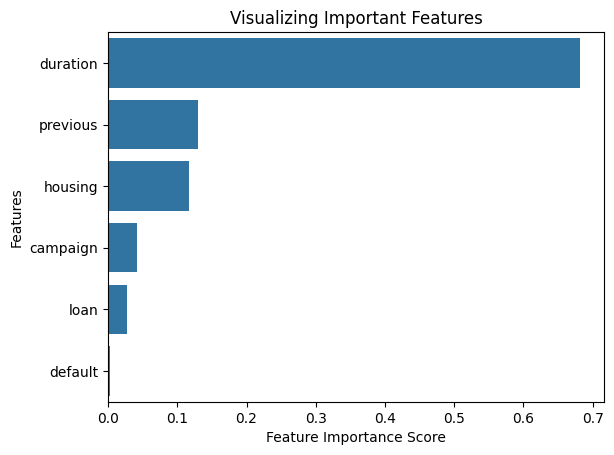

In [171]:
sns.barplot(x=feature_scores_rf, y=feature_scores_rf.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Gradient Boosting

In [172]:
#Tuning
#n_estimators: Número de árboles
#max_features: Cantidad de variables a considerar al buscar el mejor split
#max_depth: Profundidad del árbol

param_grid_gb = {
    'n_estimators': [300, 400, 500, 600, 700],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5, 6]
}

In [173]:
grid_gb = GridSearchCV(GradientBoostingClassifier(),param_grid_gb,refit=True,verbose=2,cv=5)
grid_gb.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   0.3s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=400; total time=   0.5s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=400; total time=   0.5s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=400; total time=   0.5s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=400; total time=   0.5s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=400; total time=   0.5s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=500; total time=   0.6s
[CV] END ...max_depth=2, max_features=sqrt, n_e

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [300, 400, 500, 600, 700]},
             verbose=2)

In [174]:
print(grid_gb.best_estimator_)

GradientBoostingClassifier(max_depth=2, max_features='sqrt', n_estimators=400)


In [175]:
classifier_gb = GradientBoostingClassifier(max_depth=2, max_features='sqrt', n_estimators=400).fit(X_train, y_train)

In [176]:
feature_scores_gb = pd.Series(classifier_gb.feature_importances_, index=['duration', 'previous', 'housing', 'campaign', 'loan',	'default']).sort_values(ascending=False)
feature_scores_gb

duration    0.683835
previous    0.129222
housing     0.125343
campaign    0.037090
loan        0.022163
default     0.002346
dtype: float64

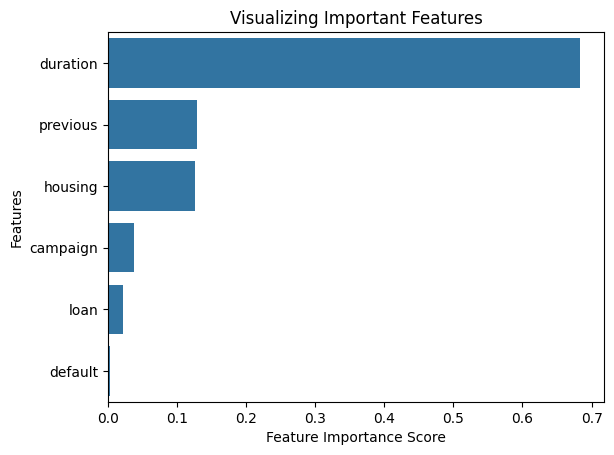

In [177]:
sns.barplot(x=feature_scores_gb, y=feature_scores_gb.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### ADABOOST

In [178]:
#Tuning
#n_estimators: Número de árboles
#learning_rate: peso aplicado a cada clasificador en cada iteración,
#               una tasa de aprendizaje más alta aumenta la contribución de cada clasificador.
#algorith: se usa para la convergencia de los clasificadores

param_grid_ab = {
    'n_estimators': [300, 400, 500, 600, 700],
    'learning_rate': [0.001, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [179]:
grid_ab = GridSearchCV(AdaBoostClassifier(),param_grid_ab,refit=True,verbose=2,cv=5)
grid_ab.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=300; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=300; total time=   0.8s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=300; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=300; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=300; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=400; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=400; total time=   1.2s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=400; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=400; total time=   1.2s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=400; total time=   1.1s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=500; total time=   1.3s
[CV] END algor

c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=300; total time=   0.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=300; total time=   0.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=300; total time=   0.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=300; total time=   0.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=300; total time=   0.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=400; total time=   1.3s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=400; total time=   1.3s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=400; total time=   1.2s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=400; total time=   1.3s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=400; total time=   1.2s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=500; total time=   1.6s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=500; total time=   1.6s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=500; total time=   1.7s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=500; total time=   1.6s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=500; total time=   1.6s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=600; total time=   1.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=600; total time=   1.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=600; total time=   1.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=600; total time=   1.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=600; total time=   1.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=700; total time=   2.2s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=700; total time=   2.2s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=700; total time=   2.3s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=700; total time=   2.3s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=700; total time=   2.3s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=300; total time=   0.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=300; total time=   0.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=300; total time=   0.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=300; total time=   0.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=300; total time=   0.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=400; total time=   1.3s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=400; total time=   1.3s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=400; total time=   1.3s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=400; total time=   1.3s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=400; total time=   1.3s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=500; total time=   1.7s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=500; total time=   2.0s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=500; total time=   2.3s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=500; total time=   2.1s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=500; total time=   1.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=600; total time=   2.5s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=600; total time=   2.2s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=600; total time=   2.2s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=600; total time=   2.1s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=600; total time=   2.1s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=700; total time=   2.5s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=700; total time=   2.5s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=700; total time=   2.5s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=700; total time=   2.6s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=700; total time=   2.5s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=300; total time=   1.2s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=300; total time=   1.0s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=300; total time=   1.1s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=300; total time=   1.1s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=300; total time=   1.0s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=400; total time=   1.4s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=400; total time=   1.4s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=400; total time=   1.4s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=400; total time=   1.4s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=400; total time=   1.4s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=   1.8s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=   1.7s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=   1.8s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=   1.8s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=500; total time=   1.9s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=600; total time=   2.2s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=600; total time=   2.4s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=600; total time=   2.6s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=600; total time=   2.3s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=600; total time=   2.4s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=700; total time=   2.8s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=700; total time=   2.5s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=700; total time=   2.5s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=700; total time=   2.5s


c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=700; total time=   2.5s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.1, 1],
                         'n_estimators': [300, 400, 500, 600, 700]},
             verbose=2)

In [182]:
print(grid_ab.best_estimator_)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=500)


In [183]:
classifier_ab = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=500).fit(X_train, y_train)

In [184]:
feature_scores_ab = pd.Series(classifier_ab.feature_importances_, index=['duration', 'previous', 'housing', 'campaign', 'loan',	'default']).sort_values(ascending=False)
feature_scores_ab

duration    0.695967
previous    0.119354
housing     0.101087
loan        0.046741
campaign    0.036851
default     0.000000
dtype: float64

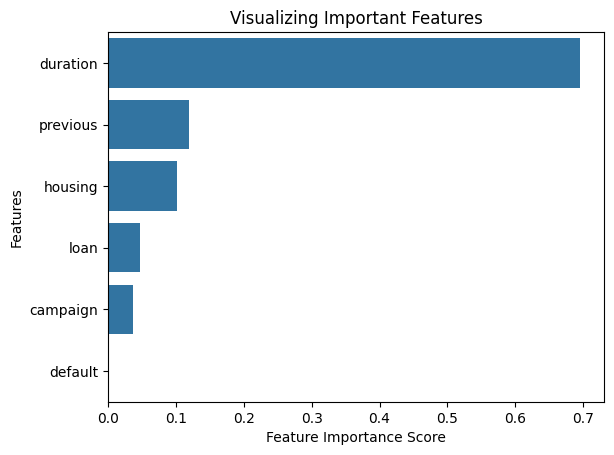

In [185]:
sns.barplot(x=feature_scores_ab, y=feature_scores_ab.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# EVALUACION

### RANDOM FOREST

In [186]:
y_pred_rf = classifier_rf.predict(X_test)

In [187]:
confusion_matrix(y_test, y_pred_rf)

array([[788, 241],
       [179, 908]], dtype=int64)

Confusion matrix, without normalization
[[788 241]
 [179 908]]
Normalized confusion matrix
[[0.76579203 0.23420797]
 [0.16467341 0.83532659]]


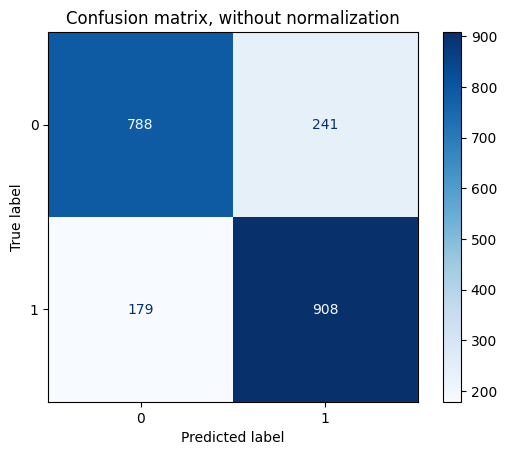

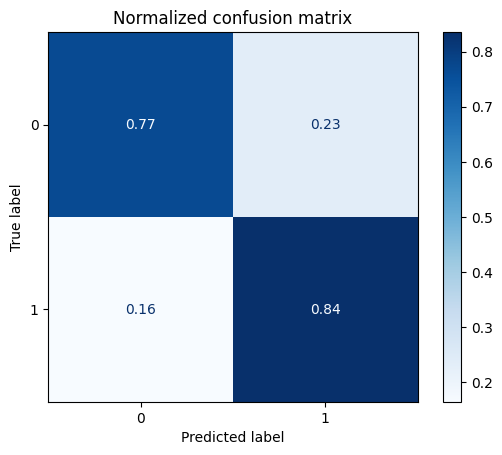

In [188]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(classifier_rf, X_test, y_test,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [189]:
y_pred_prob_rf = classifier_rf.predict_proba(X_test)

In [190]:
false_positive_rate_rf, true_positive_rate_rf, thresholds = roc_curve(y_test, y_pred_prob_rf[:,1])

In [191]:
roc_auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)
roc_auc_rf

0.8749314944797738

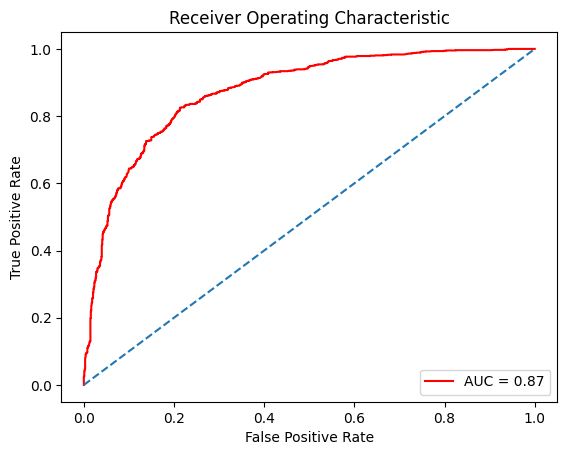

In [192]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_rf,true_positive_rate_rf, color='red',label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [193]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1029
           1       0.79      0.84      0.81      1087

    accuracy                           0.80      2116
   macro avg       0.80      0.80      0.80      2116
weighted avg       0.80      0.80      0.80      2116



### GRADIENT BOOSTING

In [194]:
y_pred_gb = classifier_gb.predict(X_test)

In [195]:
confusion_matrix(y_test, y_pred_gb)

array([[805, 224],
       [187, 900]], dtype=int64)

Confusion matrix, without normalization
[[805 224]
 [187 900]]
Normalized confusion matrix
[[0.78231293 0.21768707]
 [0.17203312 0.82796688]]


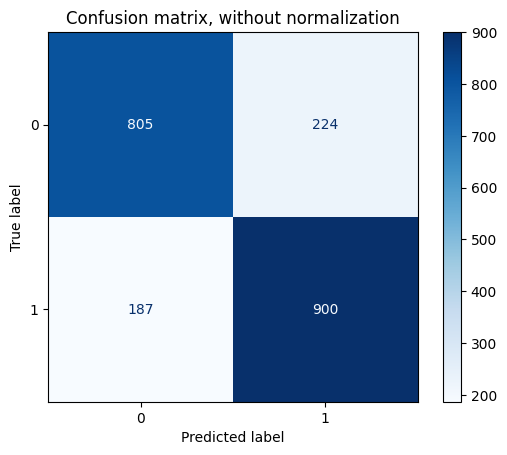

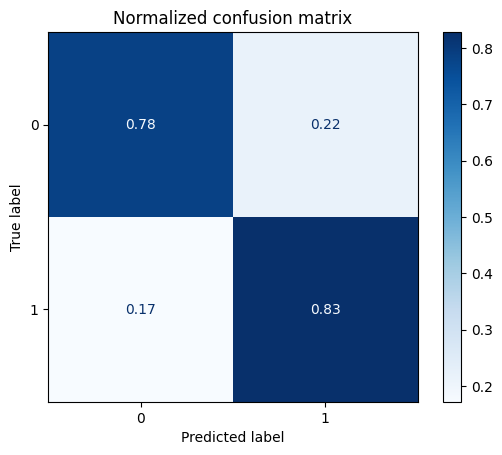

In [196]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(classifier_gb, X_test, y_test,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [197]:
y_pred_prob_gb = classifier_gb.predict_proba(X_test)

In [198]:
false_positive_rate_gb, true_positive_rate_gb, thresholds = roc_curve(y_test, y_pred_prob_gb[:,1])

In [199]:
roc_auc_gb = auc(false_positive_rate_gb, true_positive_rate_gb)
roc_auc_gb


0.8763512238907918

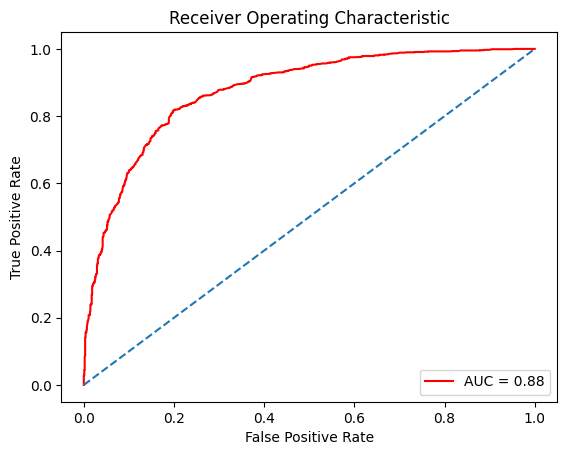

In [200]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_gb,true_positive_rate_gb, color='red',label = 'AUC = %0.2f' % roc_auc_gb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [201]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1029
           1       0.80      0.83      0.81      1087

    accuracy                           0.81      2116
   macro avg       0.81      0.81      0.81      2116
weighted avg       0.81      0.81      0.81      2116



### ADABOOST

In [202]:
y_pred_ab = classifier_ab.predict(X_test)

In [203]:
confusion_matrix(y_test, y_pred_ab)

array([[823, 206],
       [221, 866]], dtype=int64)

Confusion matrix, without normalization
[[823 206]
 [221 866]]
Normalized confusion matrix
[[0.79980564 0.20019436]
 [0.20331187 0.79668813]]


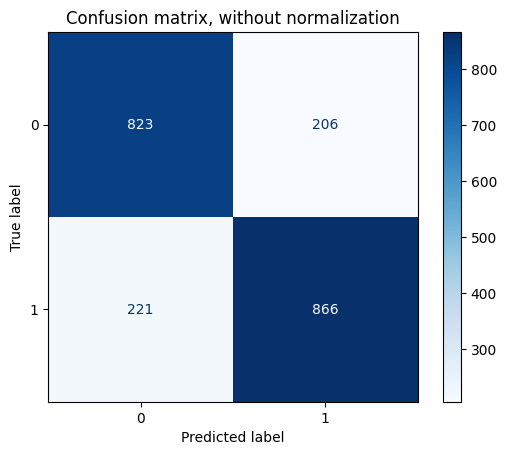

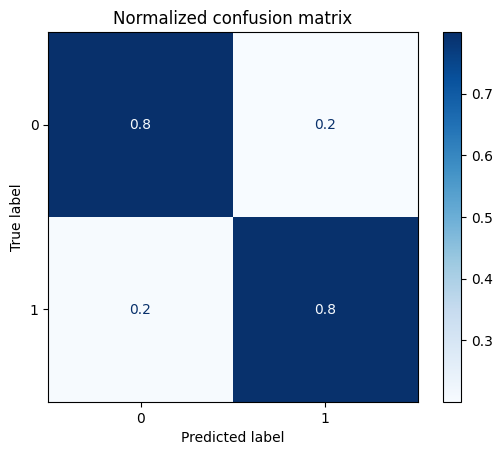

In [204]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(classifier_ab, X_test, y_test,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [205]:
y_pred_prob_ab = classifier_ab.predict_proba(X_test)

In [206]:
false_positive_rate_ab, true_positive_rate_ab, thresholds = roc_curve(y_test, y_pred_prob_ab[:,1])

In [207]:
roc_auc_ab = auc(false_positive_rate_ab, true_positive_rate_ab)
roc_auc_ab


0.8732851269039618

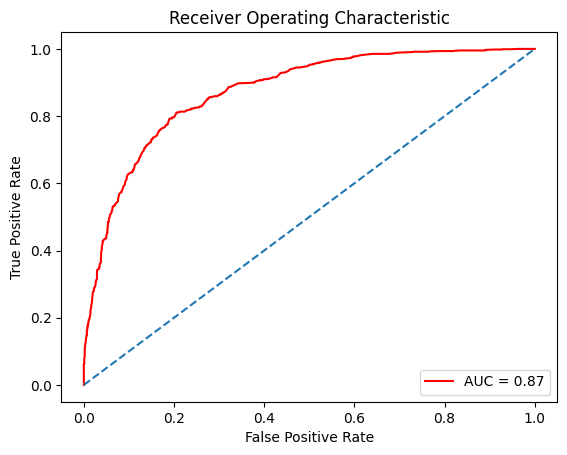

In [208]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_ab,true_positive_rate_ab, color='red',label = 'AUC = %0.2f' % roc_auc_ab)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [209]:
print(classification_report(y_test, y_pred_ab))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1029
           1       0.81      0.80      0.80      1087

    accuracy                           0.80      2116
   macro avg       0.80      0.80      0.80      2116
weighted avg       0.80      0.80      0.80      2116



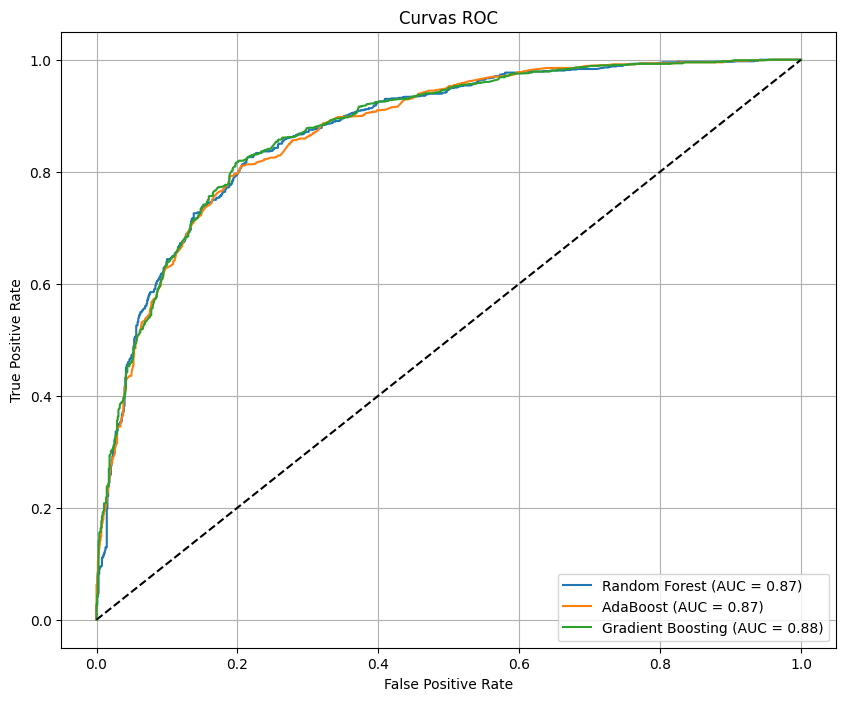

In [211]:
# Dibujar las curvas ROC
plt.figure(figsize=(10, 8))
plt.plot(false_positive_rate_rf, true_positive_rate_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(false_positive_rate_ab, true_positive_rate_ab, label=f'AdaBoost (AUC = {roc_auc_ab:.2f})')
plt.plot(false_positive_rate_gb, true_positive_rate_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# Dibujar la línea de referencia
plt.plot([0, 1], [0, 1], 'k--')

# Configurar la gráfica
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.grid()

# Mostrar la gráfica
plt.show()

# Comparar los modelos y seleccionar el más adecuado.

In [212]:
dataf = pd.concat([pd.DataFrame(X_test_orig),pd.DataFrame(y_test),pd.DataFrame(y_pred_gb),pd.DataFrame(y_pred_prob_gb)],axis=1)

In [215]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3836 entries, 9014 to 2115
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  2116 non-null   float64
 1   previous  2116 non-null   float64
 2   housing   2116 non-null   float64
 3   campaign  2116 non-null   float64
 4   loan      2116 non-null   float64
 5   default   2116 non-null   float64
 6   target    2116 non-null   float64
 7   0         2116 non-null   float64
 8   0         2116 non-null   float64
 9   1         2116 non-null   float64
dtypes: float64(10)
memory usage: 329.7 KB


In [216]:
dataf.isnull().sum()

duration    1720
previous    1720
housing     1720
campaign    1720
loan        1720
default     1720
target      1720
0           1720
0           1720
1           1720
dtype: int64

In [217]:
dataf = dataf.dropna()

In [218]:
dataf.head(5)

,duration,previous,housing,campaign,loan,default,target,0,0,1
579,25.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.917561,0.082439
1418,585.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.721054,0.278946
1842,419.0,0.0,1.0,7.0,0.0,0.0,0.0,1.0,0.381770,0.618230
1373,14.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,0.559779,0.440221
1670,220.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.350051,0.649949


In [219]:
dataf.columns = ['duration', 'previous', 'housing', 'campaign', 'loan', 'default', 'target', 'target_Pred', 'target_pred_prob_0',	'target_pred_prob_1']

In [220]:
dataf.head()

,duration,previous,housing,campaign,loan,default,target,target_Pred,target_pred_prob_0,target_pred_prob_1
579,25.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.917561,0.082439
1418,585.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.721054,0.278946
1842,419.0,0.0,1.0,7.0,0.0,0.0,0.0,1.0,0.381770,0.618230
1373,14.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,0.559779,0.440221
1670,220.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.350051,0.649949


In [222]:
quantiles = dataf['target_pred_prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.104709
0.4    0.322017
0.6    0.649949
0.8    0.840926
Name: target_pred_prob_1, dtype: float64

In [223]:
dataf.to_csv('Ddataf.csv', index = False)

1. Para la base de datos dataf, crear una variable "score1", con las categorías: Muy alto, alto, medio, bajo y muy bajo. 
Usar: Target_Pred_Prob_1


In [224]:
import pickle

In [226]:
Pkl_Filename = "classifier.pkl"

with open (Pkl_Filename, 'wb') as file:
    pickle.dump(classifier_gb, file)

In [227]:
dataf['score1'] = pd.cut(dataf['target_pred_prob_1'], bins=[0,0.2,0.4,0.6,0.8,1], labels=['Muy bajo','Bajo','Medio','Alto','Muy alto'])
dataf.head(5)


,duration,previous,housing,campaign,loan,default,target,target_Pred,target_pred_prob_0,target_pred_prob_1,score1
579,25.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.917561,0.082439,Muy bajo
1418,585.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.721054,0.278946,Bajo
1842,419.0,0.0,1.0,7.0,0.0,0.0,0.0,1.0,0.381770,0.618230,Alto
1373,14.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,0.559779,0.440221,Medio
1670,220.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.350051,0.649949,Alto


In [231]:
import pandas as pd

# Calcular los deciles para la variable 'Target'
dataf['Deciles'] = pd.qcut(dataf['target'], 10, labels=False, duplicates='drop')

# Definir las categorías basadas en los deciles
def categorize_score(decile):
    if decile == 9:  # Deciles 10%
        return 'Muy Alto'
    elif decile >= 7:  # Deciles 70% a 90%
        return 'Alto'
    elif decile >= 4:  # Deciles 40% a 70%
        return 'Medio'
    elif decile >= 1:  # Deciles 10% a 40%
        return 'Bajo'
    else:  # Deciles 0%
        return 'Muy Bajo'

# Aplicar la función para crear la nueva variable 'score2'
dataf['score2'] = dataf['Deciles'].apply(categorize_score)

# Eliminar la columna 'Deciles' si ya no es necesaria
dataf.drop(columns=['Deciles'], inplace=True)

In [232]:
dataf.head()

,duration,previous,housing,campaign,loan,default,target,target_Pred,target_pred_prob_0,target_pred_prob_1,score1,score2
579,25.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.917561,0.082439,Muy bajo,Muy Bajo
1418,585.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.721054,0.278946,Bajo,Muy Bajo
1842,419.0,0.0,1.0,7.0,0.0,0.0,0.0,1.0,0.381770,0.618230,Alto,Muy Bajo
1373,14.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,0.559779,0.440221,Medio,Muy Bajo
1670,220.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.350051,0.649949,Alto,Muy Bajo
